In [52]:
#1 Barcha kerakli frameworklarni import qilaman
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

### Quyidagi ma’lumotlar to’plami Hindistonning Qandli diabet va buyrak kasalliklari milliy institutidan olingan. Maqsad diagnostik o’lchovlar asosida bemorda diabet bor-yo’qligini taxmin qilishdir.

Dataset ichida barcha bemorlar kamida 21 yoshli ayollari.


#### Ustunlar

In [64]:
# Pregnancies: homilador bo’lish soni
# Glucose: glyukozaga test natijasi
# BloodPressure: diastolik qon bosimi (mm Hg)
# SkinThickness: Triceps teri burmasining qalinligi (mm)
# Insulin: 2 soatlik sarum insulini (mu U/ml)
# BMI: Tana massasi indeksi (vazn kg / (m bo’yi) ^ 2)
# DiabetesPedigreeFunction: diabetning naslchilik funktsiyasi
# Age: Yosh (yil)
# Outcome: Class (0 – diabet yo’q, 1 – diabet)

In [54]:
# 2 Datasetni import qilaman
df = pd.read_csv("https://github.com/anvarnarz/praktikum_datasets/blob/main/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [55]:
# 3 NaN qiymatlarni tekshirib olaman
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [56]:
# 4 Korelatsiyaviy bog'liqlikni ko'rib olaman
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [57]:
# 5 Datasetdagi kategoriyalarini ko'rib olaman
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [58]:
# 6 Tahmin qilinishi kerak bo'lgan ustunning qiymatlar soni
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [61]:
# 7 QonBosimi 0 teng bo'lgan qatorlarni ko'rib olaman
df[df['BloodPressure'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [60]:
# 8 BMI ga shu xolatni qo'llayman
df[df['BMI'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [62]:
# 9 Qatorlarni tashlab yuboraman
df.drop(df[df['BloodPressure'] == 0].index, inplace=True)
df.drop(df[df['BMI'] == 0].index, inplace=True)

# ML

In [30]:
# 10 Balansni ushlagan xolda train va test_setlarga ajratib olaman
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=35)
for train_index, test_index in stratified_split.split(df,df['Outcome']):
    strat_train_set = df.iloc[train_index]
    strat_test_set = df.iloc[test_index]

In [31]:
# 11 X, y larga bo'lib olaman
X = strat_train_set.drop('Outcome', axis=1).values
y = strat_train_set['Outcome'].values

In [33]:
# 12 test_set X y larga bo'lib olaman
X_test = strat_test_set.drop('Outcome', axis=1).values
y_test = strat_test_set['Outcome'].values

In [34]:
# 13 KNN modelidan foydalanaman.
knn = KNeighborsClassifier(n_neighbors=5) # k-ni qiymati

knn.fit(X, y)

KNeighborsClassifier()

In [63]:
# 14 model bilan tahmin qilaman
y_predict = knn.predict(X_test)

In [41]:
# 15 Jaccard indexni ko'rib olaman
jaccard_score(y_test, y_predict)

0.42857142857142855

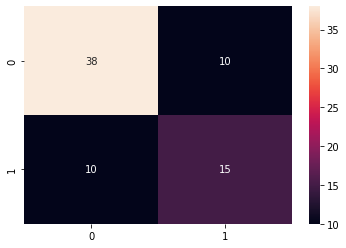

In [42]:
# 16 Confusion matrix. Visualization.
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [43]:
# 17 model aniqligini o'lchab ko'raman
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print(f"{precision=}\n{recall=}\n{f1=}\n{accuracy=}")

precision=0.6
recall=0.6
f1=0.6
accuracy=0.726027397260274


In [44]:
# 18 Har bir klass uchun classification_report.
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        48
           1       0.60      0.60      0.60        25

    accuracy                           0.73        73
   macro avg       0.70      0.70      0.70        73
weighted avg       0.73      0.73      0.73        73



In [45]:
# 19 Cross validation.
predict = cross_val_predict(estimator = knn, X = X, y = y, cv = 5)

print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.80      0.78       430
           1       0.59      0.53      0.55       226

    accuracy                           0.71       656
   macro avg       0.68      0.67      0.67       656
weighted avg       0.70      0.71      0.70       656



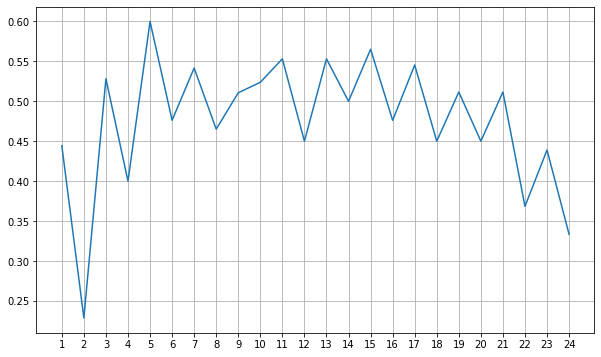

In [46]:
# 20 k-uchun eng yaxshi qiymatni aniqlab olaman
f1 = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k) # k-ni qiymati
    knn.fit(X, y)
    y_predict = knn.predict(X_test)
    f1.append(f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

# GridSearchCV

In [47]:
param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=24),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [48]:
knn_gscv.cv_results_['rank_test_score']

array([24, 19, 23, 21, 22, 18, 20, 16, 17, 14,  9,  4,  4,  2,  1, 11,  3,
        7,  8,  6, 12, 13, 15, 10], dtype=int32)

In [49]:
knn_gscv.best_params_

{'n_neighbors': 15}

In [50]:
knn_gscv.best_score_

0.7606985889428637

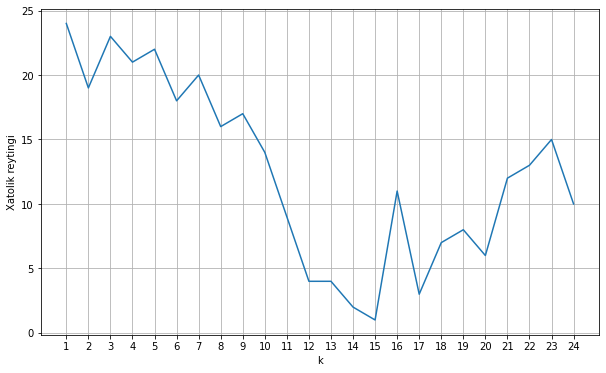

In [51]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel("k")
plt.ylabel("Xatolik reytingi")
plt.grid()
plt.show()